<center>
    <a>
        <img src="https://willowcreek.co.za/wp-content/uploads/2020/03/WC-Pets-Article-Feature-Image.png"
             border="0" 
             width=430
             height=420  
             class="center">
    </a>


# <p> <center style="background-color:#fffff;font-family:Gabriola;color:black;font-size:250%;text-align:center;border-radius:0px"> Cats Vs Dogs Image Classification </center></p>


# <b style="background-color:#fffff;font-family:'Comic Sans MS';color:black;font-size:100%;text-align:left;border-radius:0px"> Table of Content </b>

<table border="0" align="left" style="text-align:left;font-family:'Comic Sans MS'; border-collapse: collapse;">
  <colgroup>
    <col style="width:800px;height:75px;">
  </colgroup>
  <tr>
    <th style="text-align:left;font-size:16px;background-color:white; border: none;">
      <a href="#1" style="text-decoration:none;"><b>1. Unzipping the train and test files</b></a>
    </th>
  </tr>
    
  <tr>
    <th style="text-align:left;font-size:16px;background-color:white; border: none;">
      <a href="#2" style="text-decoration:none;"><b>2. Creating dataframes of image paths and labels</b></a>
    </th>
  </tr>
  <tr>
    <th style="text-align:left;font-size:16px;background-color:white; border: none;">
      <a href="#3" style="text-decoration:none;"><b>3. Exploring The Data</b></a>
    </th>
  </tr>
  <tr>
    <th style="text-align:left;font-size:16px;background-color:white; border: none;">
      <a href="#4" style="text-decoration:none;"><b>4. ImageDataGenerator</b></a>
    </th>
  </tr>
  <tr>
    <th style="text-align:left;font-size:16px;background-color:white; border: none;">
      <a href="#5" style="text-decoration:none;"><b>5. ConvNN Sequential Model</b></a>
    </th>
  </tr>
    <tr>
    <th style="text-align:left;font-size:16px;background-color:white; border: none;">
      <a href="#6" style="text-decoration:none;"><b>6. Transfer Learning: VGG16</b></a>
    </th>
  </tr>
    
</table>



<a id="1"></a>

# <b style="background-color:#fffff;font-family:'Comic Sans MS';color:black;font-size:100%;text-align:left;border-radius:0px"> Unzipping the train and test files </b>

In [1]:
FAST_RUN = False

In [2]:
import os
from zipfile import ZipFile

# printing all files-paths
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

path = '/kaggle/input/dogs-vs-cats-redux-kernels-edition/'
files = ['train.zip', 'test.zip']

# unzipping the train and test files
for file in files:
    with ZipFile(path + file, 'r') as zip_file:
        zip_file.extractall(path = '/kaggle/working/')

/kaggle/input/dogs-vs-cats-redux-kernels-edition/sample_submission.csv
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train.zip
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test.zip
/kaggle/input/resnet50/resnet50_weights_tf_dim_ordering_tf_kernels.h5
/kaggle/input/resnet50/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5
/kaggle/input/resnet50/imagenet_class_index.json


<a id="2"></a>

# <b style="background-color:#fffff;font-family:'Comic Sans MS';color:black;font-size:100%;text-align:left;border-radius:0px"> Creating dataframes of image paths and labels </b>

**The Training dataframe consists of two columns :**
- the file name for each image
- the label for each iamge "0 for cat, 1 for dogs"

In [3]:
import pandas as pd

train_path = '/kaggle/working/train/'

# reading all filenames in train directory
filenames = os.listdir(train_path)
print("first filenames in the training images:", filenames[:4], sep = "\n")

# extracting the label ('dog', 'cat') from filenames
labels = [int(x.split('.')[0] == 'dog') for x in filenames]
print("labels :", labels[:4], sep = "\n")

# creating the train dataframe with filenames, labels
train_df = pd.DataFrame({'filename' : filenames, 'label' : labels})
print('training set shape', train_df.shape, sep = "\n")

train_df.head()

first filenames in the training images:
['cat.2010.jpg', 'dog.696.jpg', 'dog.1257.jpg', 'cat.6533.jpg']
labels :
[0, 1, 1, 0]
training set shape
(25000, 2)


filename  label
0  cat.2010.jpg      0
1   dog.696.jpg      1
2  dog.1257.jpg      1
3  cat.6533.jpg      0
4  cat.9840.jpg      0

**The Testing dataframe with only one column `filename` and sorting it by id**

In [4]:
test_path = '/kaggle/working/test/'

# reading all filenames in test directory
filenames = os.listdir(test_path)
print("first filenames in the test images:", filenames[:4], sep = "\n")

# extracting the id from filename
ids = [int(x.split('.')[0]) for x in filenames]
print("ids :", ids[:4], sep = "\n")

# creating the dataframe with ids, filenames
test = pd.DataFrame({'id' : ids, 'filename' : filenames})
print('test-set shape:', test.shape, sep = "\n")

# sorting the test dataframe by the id and reseting index
test.sort_values(by = ['id'], axis = 0, inplace = True)
test.reset_index(inplace = True, drop = True)

# droping the id column as it's no longer useful
test.drop(columns = ['id'], inplace = True)

test.head()

first filenames in the test images:
['5911.jpg', '8915.jpg', '11175.jpg', '8247.jpg']
ids :
[5911, 8915, 11175, 8247]
test-set shape:
(12500, 2)


filename
0    1.jpg
1    2.jpg
2    3.jpg
3    4.jpg
4    5.jpg

<a id="3"></a>

# <b style="background-color:#fffff;font-family:'Comic Sans MS';color:black;font-size:100%;text-align:left;border-radius:0px"> Explore the Data</b>

**Spliting the data into train and validation**

In [5]:
from sklearn.model_selection import train_test_split

train, validation = train_test_split(train_df, test_size = 0.2,
                                         stratify = train_df['label'], random_state = 42)

print("Train-set shape:", train.shape)
print("Validation-set shape:", validation.shape)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Train-set shape: (20000, 2)
Validation-set shape: (5000, 2)


**Importing visualization librarie and Setting up rcParams**

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('seaborn-v0_8-muted')

plt.rcParams['font.size'] = 10
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

**Cats and Dogs Classes are balanced**

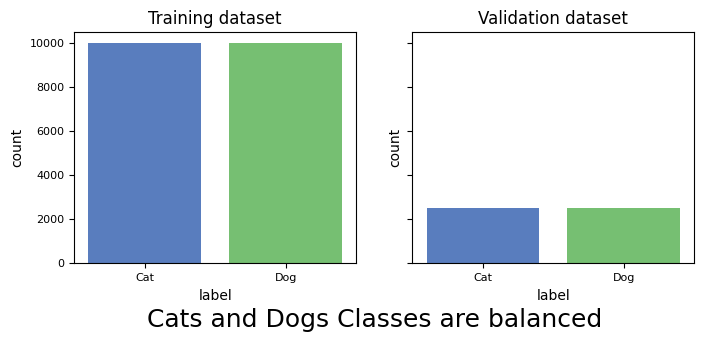

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(8, 3), sharey = True)

sns.countplot(x = 'label', data = train, ax=ax[0])
ax[0].set_title('Training dataset')
ax[0].set_xticks(ticks=[0, 1], labels=['Cat', 'Dog'])

sns.countplot(x = 'label', data = validation, ax=ax[1])
ax[1].set_title('Validation dataset')
ax[1].set_xticks(ticks=[0, 1], labels=['Cat', 'Dog'])

plt.suptitle('Cats and Dogs Classes are balanced', y = -0.04, fontsize=18)
plt.show()

**looking at a sample**

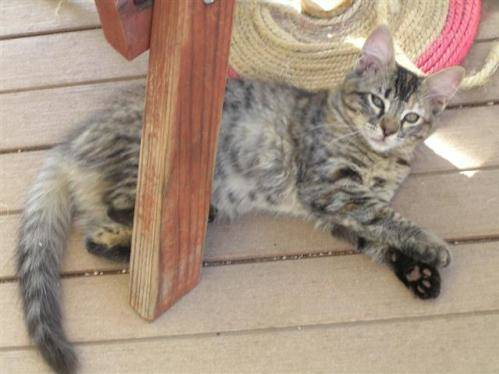

In [8]:
from tensorflow.keras.preprocessing.image import load_img

load_img((train_path + train.loc[0, 'filename']))

<a id="4"></a>

# <b style="background-color:#fffff;font-family:'Comic Sans MS';color:black;font-size:100%;text-align:left;border-radius:0px"> ImageDataGenerator </b>

**defining ImageDataGenerator object to load images**

In [9]:
IMAGE_WIDTH = 360
IMAGE_HEIGHT = 360
IMAGE_SIZE = (IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS = 3

BATCH_SIZE = 32

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator( rescale = 1.0/255, 
                                    rotation_range = 15.0,
                                    width_shift_range = 0.1,
                                    height_shift_range = 0.1,
                                    shear_range = 0.1,
                                    zoom_range = 0.1,
                                    horizontal_flip= True,
                                    fill_mode = 'nearest',)

train_datagen = train_datagen.flow_from_dataframe(
                                              # dataframe to get paths from
                                                dataframe = train,
                                              # directory path images are in
                                                directory = train_path,
                                              # column name file paths are in
                                                x_col = 'filename',
                                              # column name output targets are in
                                                y_col = 'label',
                                              # size to rescale the output images to
                                                target_size = IMAGE_SIZE,
                                              # size of the batch
                                                batch_size = BATCH_SIZE,
                                              # mode "row" output targets is array of y_col as it is
                                                class_mode = 'raw',
                                            )

Found 20000 validated image filenames.


**Visualizing a sample from training images**

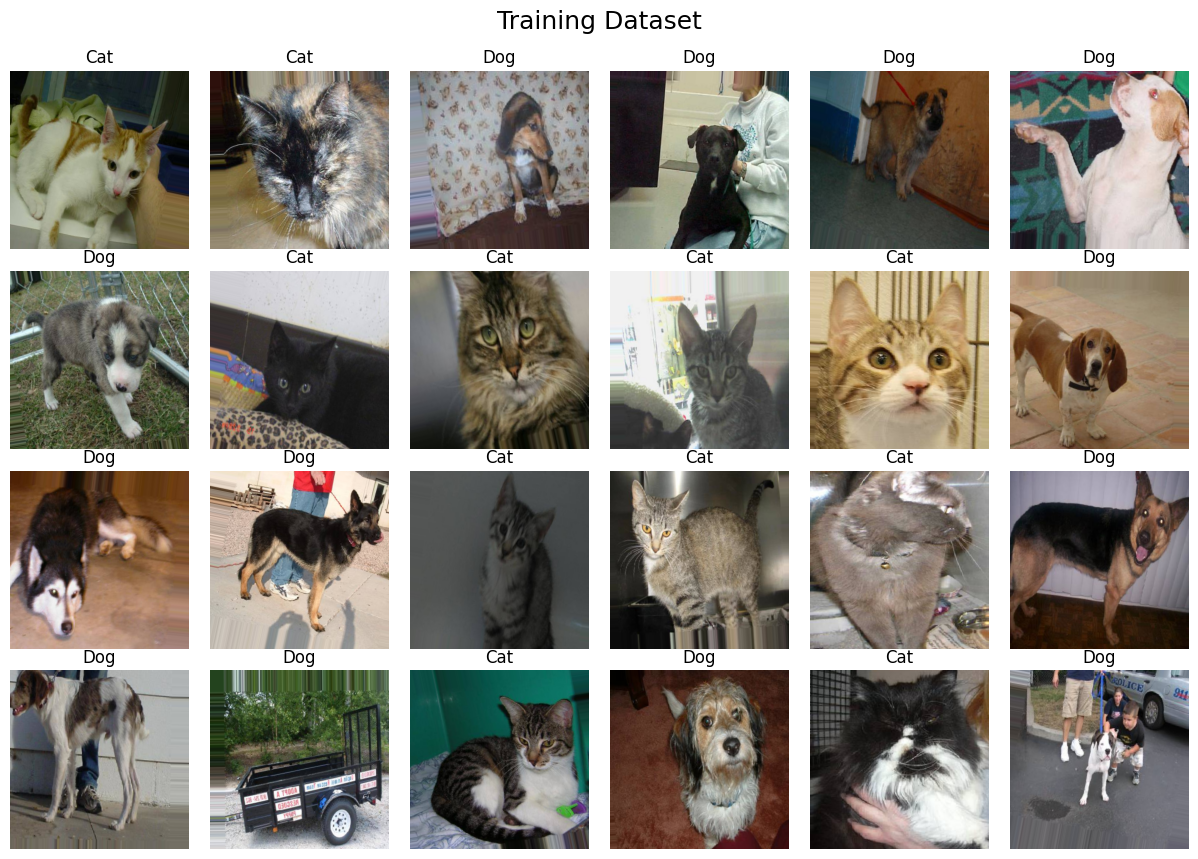

In [11]:
fig, ax = plt.subplots(4, 6, figsize = (12, 8))

i, j = 0, 0
for images_batch, labels_batch in train_datagen:
    ax[i][j].imshow(images_batch[0])
    ax[i][j].set_title(['Cat', 'Dog'][labels_batch[0]])
    ax[i][j].axis('off')
    i += 1
    if i == 4: i, j = 0, j+1
    if j == 6: break
        
fig.tight_layout(pad=0.001)
plt.suptitle('Training Dataset', fontsize=18, y = 1.05)
plt.show()

In [12]:
validation_datagen = ImageDataGenerator(rescale = 1.0/255,)

validation_datagen = validation_datagen.flow_from_dataframe(
    dataframe = validation,
    directory = train_path,
    x_col = 'filename',
    y_col = 'label',
    target_size = IMAGE_SIZE,
    batch_size = BATCH_SIZE,
    class_mode = 'raw',
    
)

Found 5000 validated image filenames.


In [13]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = test_datagen.flow_from_dataframe(
                                test, 
                                test_path, 
                                x_col='filename',
                                y_col=None,
                                class_mode=None,
                                target_size= IMAGE_SIZE,
                                batch_size= BATCH_SIZE,
                                shuffle=False
                            )

Found 12500 validated image filenames.


**Visualizing a sample from testing images**

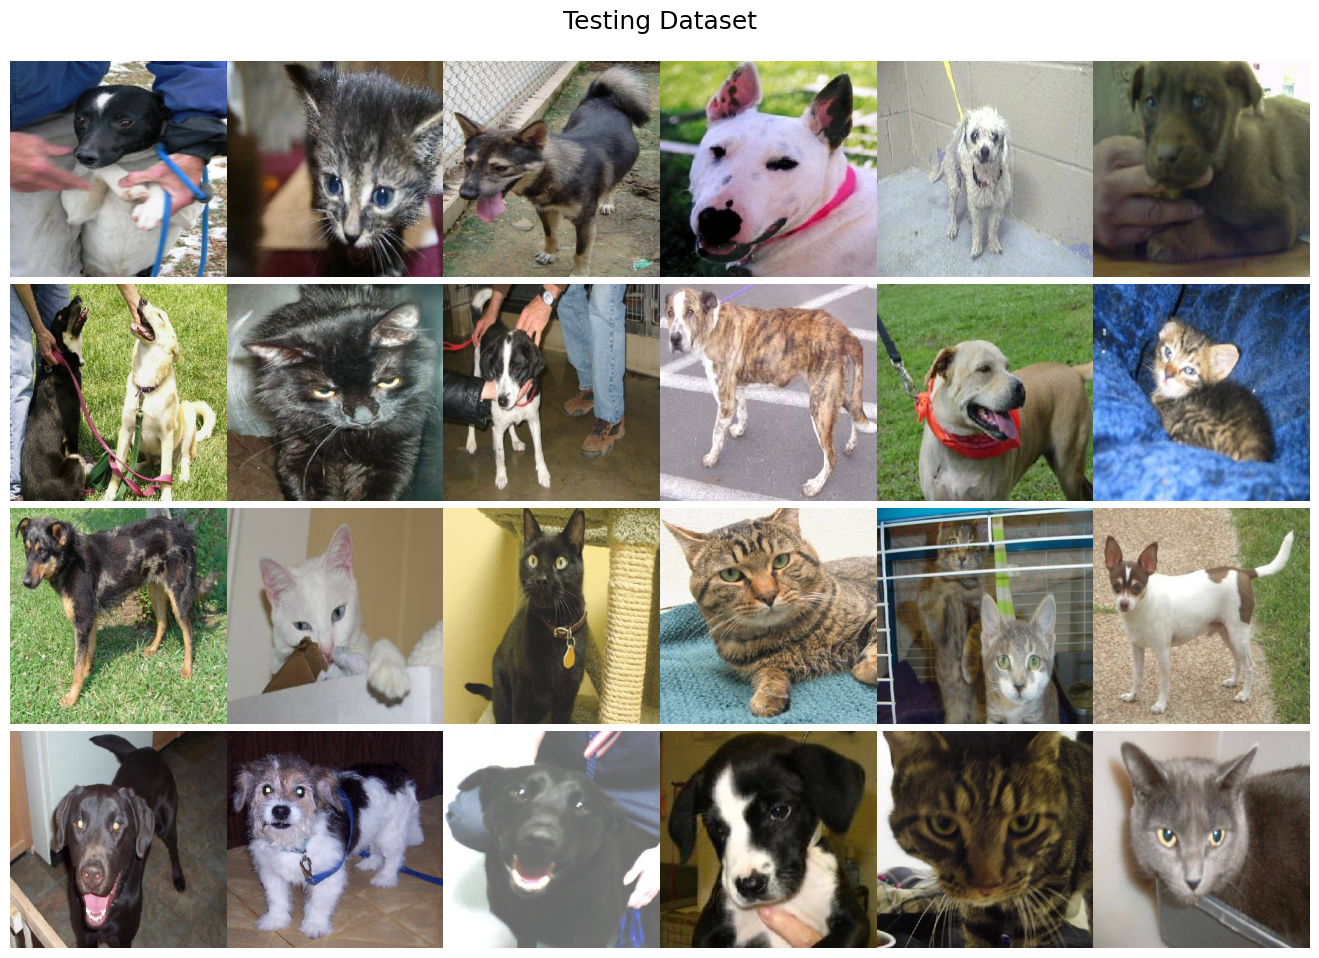

In [14]:
fig, ax = plt.subplots(4, 6, figsize = (13, 9))
plt.subplots_adjust(hspace=0.05, wspace=0.05)

i, j = 0, 0
for images_batch in test_datagen:
    ax[i][j].imshow(images_batch[0])
    ax[i][j].axis('off')
    i += 1
    if i == 4: i, j = 0, j+1
    if j == 6: break

fig.tight_layout(pad=0.001)
plt.suptitle('Testing Dataset', fontsize=18, y = 1.05)

plt.show()

<a id="5"></a>

# <b style="background-color:#fffff;font-family:'Comic Sans MS';color:black;font-size:100%;text-align:left;border-radius:0px"> ConvNN Sequential Model </b>

**building model structure**

In [15]:
!pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.8/993.8 kB 15.5 MB/s eta 0:00:00


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 358, 358, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 356, 356, 32)      9248      
                                                                 
 batch_normalization (BatchN  (None, 356, 356, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 178, 178, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 178, 178, 32)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 176, 176, 64)      1

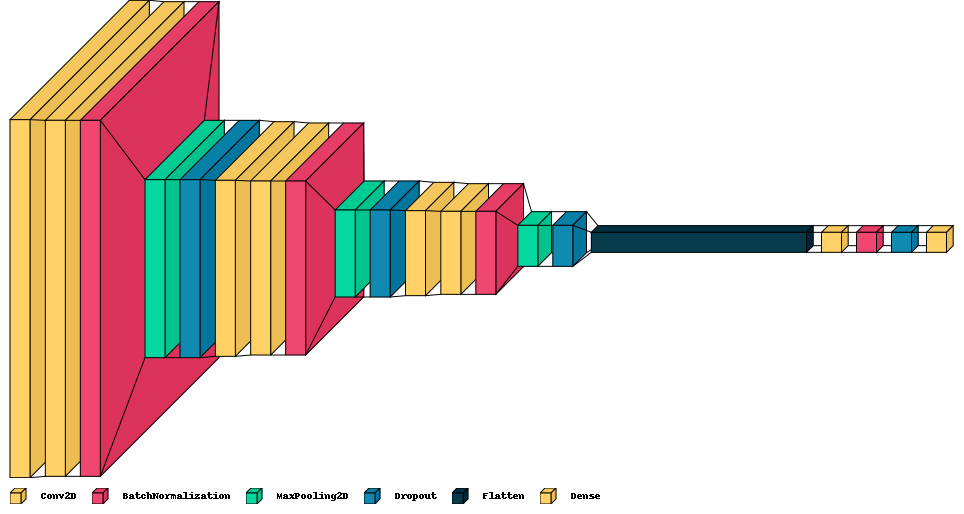

In [16]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, Activation, BatchNormalization
import visualkeras

tf.keras.backend.clear_session()
tf.random.set_seed(42)


def build_model():
    model = Sequential()
    
    model.add(Conv2D(32, (3, 3), activation='relu',
                     input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS, )))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))

    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))

    model.add(Flatten())
    
    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    
    return model

model = build_model()
model.summary()
visualkeras.layered_view(model, legend = True, scale_xy=1, scale_z=0.001, spacing=15)

**Compiling  model**

In [17]:
adam_opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer = adam_opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

**Call-backs**

In [18]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# Stop training when 'validation loss' has stopped improving.
early_stopping = EarlyStopping(monitor = 'val_loss', min_delta = 1e-4, 
                                                       patience = 5,  verbose = 1)

# Reduce learning rate when 'validation loss' has stopped improving.
reduce_learning_rate = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.5,
                                                         patience = 2, verbose = 1, min_lr = 1e-5)


#saving best model weights on the validation-set
checkpoint_filepath = '/kaggle/working/checkpoint.weights.h5'
model_checkpoint = ModelCheckpoint(
                            filepath=checkpoint_filepath,
                            save_weights_only=True,
                            monitor='val_loss',
                            mode='max',
                            save_best_only=True
                        )



call_backs = [reduce_learning_rate, early_stopping, model_checkpoint]

In [19]:
epochs = 3 if FAST_RUN else 20
history = model.fit(train_datagen,
                      steps_per_epoch= train.shape[0]//BATCH_SIZE,
                      epochs = epochs,
                      validation_data= validation_datagen, 
                      validation_steps= validation.shape[0]// BATCH_SIZE,
                      callbacks = call_backs,
                   )

Epoch 1/20


2024-05-22 03:17:27.245649: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


625/625 [==============================] - 652s 1s/step - loss: 0.7575 - accuracy: 0.5868 - val_loss: 0.7051 - val_accuracy: 0.5421 - lr: 0.0010
Epoch 2/20
625/625 [==============================] - 648s 1s/step - loss: 0.6192 - accuracy: 0.6550 - val_loss: 0.6735 - val_accuracy: 0.6044 - lr: 0.0010
Epoch 3/20
625/625 [==============================] - 643s 1s/step - loss: 0.5866 - accuracy: 0.6839 - val_loss: 0.6114 - val_accuracy: 0.6875 - lr: 0.0010
Epoch 4/20
625/625 [==============================] - 643s 1s/step - loss: 0.5651 - accuracy: 0.7057 - val_loss: 2.0015 - val_accuracy: 0.5094 - lr: 0.0010
Epoch 5/20
625/625 [==============================] - 643s 1s/step - loss: 0.5560 - accuracy: 0.7135 - val_loss: 0.5411 - val_accuracy: 0.7300 - lr: 0.0010
Epoch 6/20
625/625 [==============================] - 640s 1s/step - loss: 0.5424 - accuracy: 0.7192 - val_loss: 0.5270 - val_accuracy: 0.7340 - lr: 0.0010
Epoch 7/20
625/625 [==============================] - 635s 1s/step - loss: 

In [20]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    fig, ax = plt.subplots(2, 1, figsize = (8, 10))

    epochs = range(1, len(acc) + 1)
    ax[0].plot(epochs, acc, '--', label='Training acc')
    ax[0].plot(epochs, val_acc, label='Validation acc')
    ax[0].set_title('Training and validation accuracy')
    ax[0].set_ylim([0.0, 1.0])
    ax[0].legend()

    ax[1].plot(epochs, loss, '--', label='Training loss')
    ax[1].plot(epochs, val_loss, label='Validation loss')
    ax[1].set_title('Training and validation loss')
    ax[1].legend()
    
    plt.show()


**Model Learning Curve**

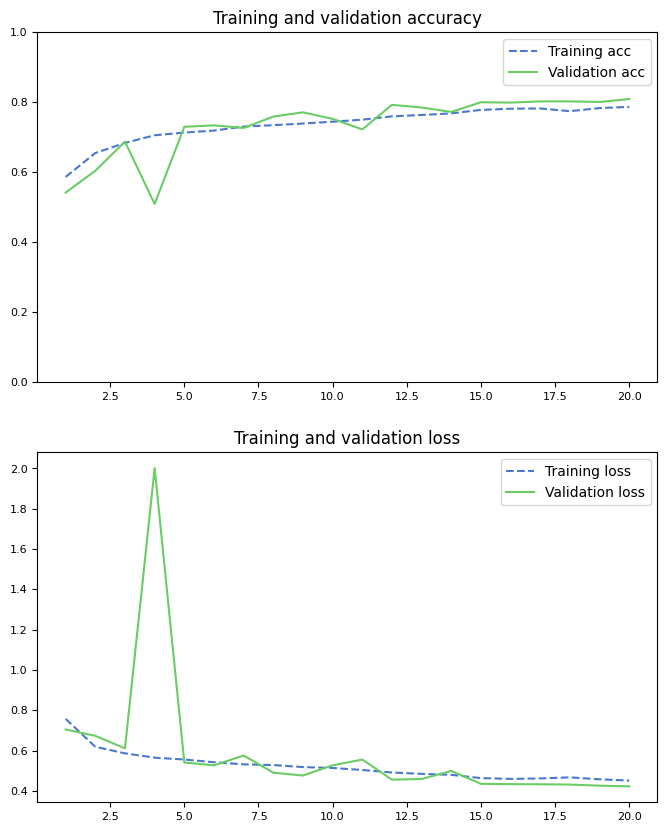

In [21]:
plot_history(history)

**Making Predictions**

In [22]:
import numpy as np

model.load_weights(checkpoint_filepath)
predict = model.predict(test_datagen, steps= np.ceil(test.shape[0]/BATCH_SIZE))
predict

391/391 [==============================] - 65s 166ms/step


array([[0.9877539 ],
       [0.9479918 ],
       [0.84695095],
       ...,
       [0.17027503],
       [0.04801869],
       [0.00218253]], dtype=float32)

In [23]:
sub = test.copy()

sub['label'] = predict
sub['id'] = sub['filename'].str.split('.').apply(lambda x: x[0])
sub = sub[['id', 'label']]
sub.to_csv('/kaggle/working/sub0.csv', index = False)

sub.head()

id     label
0  1  0.987754
1  2  0.947992
2  3  0.846951
3  4  1.000000
4  5  0.976072

<a id="6"></a>

# <b style="background-color:#fffff;font-family:'Comic Sans MS';color:black;font-size:100%;text-align:left;border-radius:0px"> Transfer Learning: VGG16 </b>

In [24]:
from keras.applications.vgg16 import VGG16

vgg16=VGG16(
    include_top=False,
    pooling='max',
    input_shape =(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS), 
    weights='imagenet',
)
vgg16.trainable = False

model = Sequential()
model.add(vgg16)
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.summary()

58889256/58889256 [==============================] - 1s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 batch_normalization_4 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 dropout_5 (Dropout)         (None, 512)               

**Compile model**

In [25]:
adam_opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer = adam_opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [26]:
# Stop training when 'validation loss' has stopped improving.
early_stopping = EarlyStopping(monitor = 'val_loss', min_delta = 1e-4, 
                                                       patience = 5,  verbose = 1)

# Reduce learning rate when 'validation loss' has stopped improving.
reduce_learning_rate = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.5,
                                                         patience = 2, verbose = 1, min_lr = 1e-5)

#saving best model weights on the validation-set
checkpoint_filepath = '/kaggle/working/checkpoint.weights.h5'
model_checkpoint = ModelCheckpoint(
                            filepath=checkpoint_filepath,
                            save_weights_only=True,
                            monitor='val_loss',
                            mode='max',
                            save_best_only=True
                        )



call_backs = [reduce_learning_rate, early_stopping, model_checkpoint]

**Training Model**

In [27]:
epochs = 3 if FAST_RUN else 20
history = model.fit(train_datagen,
                      steps_per_epoch= train.shape[0]//BATCH_SIZE,
                      epochs = epochs,
                      validation_data= validation_datagen, 
                      validation_steps= validation.shape[0]// BATCH_SIZE,
                      callbacks = call_backs
                   )

Epoch 1/20
625/625 [==============================] - 637s 1s/step - loss: 0.4970 - accuracy: 0.7750 - val_loss: 0.2716 - val_accuracy: 0.8862 - lr: 0.0010
Epoch 2/20
625/625 [==============================] - 627s 1s/step - loss: 0.4129 - accuracy: 0.8049 - val_loss: 0.2830 - val_accuracy: 0.8776 - lr: 0.0010
Epoch 3/20
625/625 [==============================] - 629s 1s/step - loss: 0.4108 - accuracy: 0.8088 - val_loss: 0.2576 - val_accuracy: 0.9038 - lr: 0.0010
Epoch 4/20
625/625 [==============================] - 623s 997ms/step - loss: 0.4004 - accuracy: 0.8097 - val_loss: 0.2433 - val_accuracy: 0.9075 - lr: 0.0010
Epoch 5/20
625/625 [==============================] - 621s 993ms/step - loss: 0.4012 - accuracy: 0.8134 - val_loss: 0.2513 - val_accuracy: 0.9069 - lr: 0.0010
Epoch 6/20
625/625 [==============================] - ETA: 0s - loss: 0.3993 - accuracy: 0.8132
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
625/625 [==============================] -

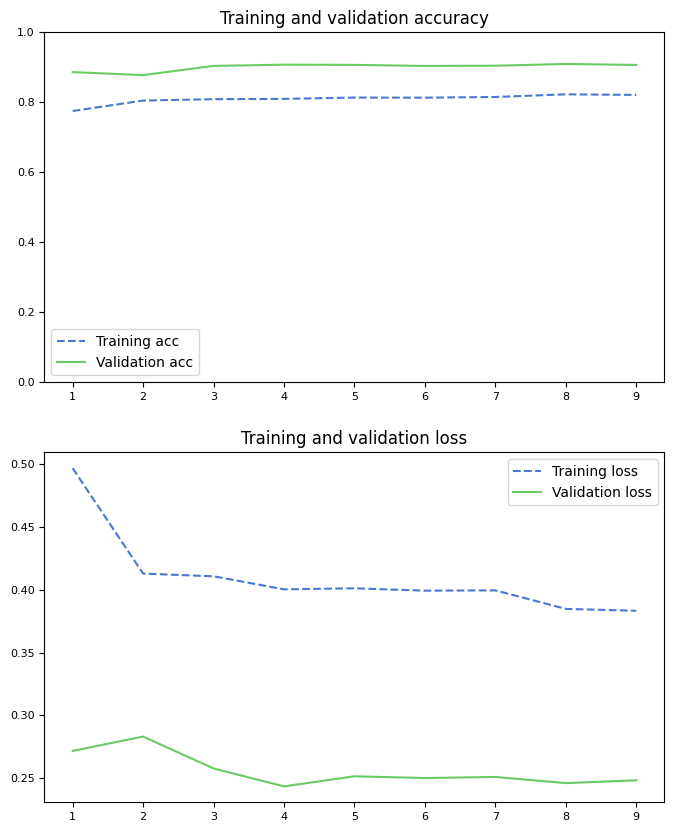

In [28]:
plot_history(history)

In [29]:
import numpy as np

model.load_weights(checkpoint_filepath)
predict = model.predict(test_datagen, steps= np.ceil(test.shape[0]/BATCH_SIZE))

sub = test.copy()

sub['label'] = predict
sub['id'] = sub['filename'].str.split('.').apply(lambda x: x[0])
sub = sub[['id', 'label']]
sub.to_csv('/kaggle/working/sub1.csv', index = False)

sub.head()

391/391 [==============================] - 70s 180ms/step


id     label
0  1  0.915018
1  2  0.999723
2  3  0.979847
3  4  0.995658
4  5  0.035884